# An short introduction to Julia for physicists

- 2020/12/21 Akio Tomya(akio.tomiya_AT_riken.jp)　http://www2.yukawa.kyoto-u.ac.jp/~akio.tomiya/index_en.html

Checked by julia version 1.5.1 on MAC os 10.14.6 

## Why I wrote this

1. My collaborators want to use Julia lang
2. It is worth to have short introduction
3. My note

## Who am I?

I am a physicists using ML to lattice QCD http://www2.yukawa.kyoto-u.ac.jp/~akio.tomiya/index_en.html

Twitter: https://twitter.com/TomiyaAkio

My book: https://www.amazon.com/Deep-Learning-Physics-Mathematical-Studies/dp/9813361077/ref=sr_1_3?dchild=1&keywords=deep+learning+and+physics&qid=1609298769&sr=8-3

### Why physicisits

My terminology is used in physics.

I assume readers have heared about some numerical calculations.

### References

1. Official web page
2. Youtube

<font color="red">
This is a short review, so I skipped several important stuff. Please refer other references.</font>

## What is Julia？

Why We Created Julia　https://julialang.org/blog/2012/02/why-we-created-julia/

We want a language that's open source, with a liberal license. We want the speed of C with the dynamism of Ruby. We want a language that's homoiconic, with true macros like Lisp, but with obvious, familiar mathematical notation like Matlab. We want something as usable for general programming as Python, as easy for statistics as R, as natural for string processing as Perl, as powerful for linear algebra as Matlab, as good at gluing programs together as the shell. Something that is dirt simple to learn, yet keeps the most serious hackers happy. We want it interactive and we want it compiled.
    (an omission of a middle part)
Even though we recognize that we are inexcusably greedy, we still want to have it all. About two and a half years ago, we set out to create the language of our greed. It's not complete, but it's time for an initial[1] release — the language we've created is called Julia. It already delivers on 90% of our ungracious demands, and now it needs the ungracious demands of others to shape it further. So, if you are also a greedy, unreasonable, demanding programmer, we want you to give it a try.

This represents all about Julia. We have v1.5.3 (Nov 9, 2020).

(Ref) https://modelingguru.nasa.gov/docs/DOC-2625

## How to start

If you use mac os, it can be installed through homebrew https://brew.sh/ . And,
```shellscript
brew install --cask julia
```
to install Julia.

For other OS, you can download a binary from https://julialang.org/downloads/ 

You can execute Julia code in three ways:

1. REPL (repeat-evaluate print loop). A command prompt for Julia. Packages are also cotrolled by this.
2. Jupyter notebook. To install Julia, type ``using Pkg; Pkg.add("IJulia")`` in REPL.
3. If you set a path, you can execute a code with typing ``julia PROGRAM.jl`` on a terminal.

This note is made with Jupyter notebook but any of them is fine.

## Hello world

We have two ways to show ``hello world'' in Julia,

In [1]:
print("hello world")

hello world

In [2]:
println("hello world")

hello world


Only difference is, ``println`` contains a change line after the string.

Variables can be shown using print/println,

In [1]:
a = 12
println("var=$a")

var=12


calculation can be done in println,

In [2]:
a = 12
println("var=$(a/2)")

var=6.0


There are two big differences than the other language.
One is, the power operation can be done with ^ symbol.
Another is, pi can be written as $\pi$.
$\pi$ can be typed by \pi with tab key.

For example, an area of a circle with radius 2,

In [3]:
A = π*2^2
println("A=$A")

A=12.566370614359172


You can use greek characters, for example,

In [6]:
ξ=1.2
println("ξ=$ξ")

ξ=1.2


Strings after ``#``, it is treated as a comment,

In [4]:
println("1,2,3") #executed
#println("4,5,6") #comment
println("7,8,9") #executed

1,2,3
7,8,9


## Array and matrix


Array can be prepared with,

In [5]:
a = [];

Semi-collon in the end of the line is not mandatory because it supresses output to the Notebook.

If you want to assume a type, like float, for example,

In [9]:
a = Float64[];

You can prepare an array with elements,

In [10]:
a = [4,3,2,1];
println(a)

[4, 3, 2, 1]


They can be combine like,

In [11]:
a = Float64[4,3,2,1];
println(a)

[4.0, 3.0, 2.0, 1.0]


type inference can be used,

In [6]:
a = [1.2, 1.3, 1.4]
println(a)

[1.2, 1.3, 1.4]


``append!`` and ``push!`` can add elements to an array,

In [13]:
a = []
append!(a,1)
append!(a,3)
append!(a,5)
println(a)

Any[1, 3, 5]


! in append! is for emphasizing change arguments in a function.

append! and push behave slightly differently,

In [7]:
a=[]
append!(a,[1,2])
append!(a,[3,4])
println(a)

Any[1, 2, 3, 4]


In [8]:
a=[]
push!(a,[1,2])
push!(a,[3,4])
println(a)

Any[[1, 2], [3, 4]]


Matrices can be composed like,

In [9]:
M = Float64[
     1 2
     3 4
]

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  4.0

type inference version is,

In [10]:
M = [
     1.0 2.0
     3.0 4.0
    ]

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  4.0

Matrix vector multiplication can be performed as,

In [18]:
M = [
     0.0 3.0
     3.0 0.0
    ]
v = [1.0, 2.0]
println(M*v)

[6.0, 3.0]


There are two proucts for vectors,

In [19]:
v = [1.0, 2.0]
println(v*v')
println(v'*v)

[1.0 2.0; 2.0 4.0]
5.0


Here ``'`` means conjugation.

I do not explain in this note about complex numbers but
to treat complex matrices, you can use ``ComplexF64[]``.
Imaginary unit is ``im``.

To access an element in an array, put \[\] after the variable.

In [20]:
a = [2,4,6,8]
println("$(a[1]), $(a[2])")

2, 4


Index is usuary started from 1. The first element and last element can be access with \[begin\], \[end\].

In [11]:
a = [2,4,6,8]
println("$(a[begin]), $(a[end])")

2, 8


## Change order of process (if, for, function)


Here I explain, ``if``, ``for``, ``function``.

### if

You can change order of process with ``if``.
For example, you can check a variable ``a`` is even or odd like,

In [22]:
a = 2
if a%2==0
    println("$a is even")
else
    println("$a is odd")
end

2 is even


Here ``%`` is an operator to calculate a reminder.

You do not have to use ``else``.
But a ``if`` block must consists with ``if`` ... ``end``.

### for

A repetaition can be implemented with ``for``:

In [23]:
for i=1:3
    println("i=$i-th repetation")
end

i=1-th repetation
i=2-th repetation
i=3-th repetation


This block also requires ``end``.

Julia has foreach type repetation,

In [24]:
li = [1,2,3]
for el in li
    println(el)
end

1
2
3


### function

Subroutine can be implemented by  ``function`` block.
This corresponds to ``def`` in Python.

For example, to calculate a square of a given number,

In [25]:
function square(x)
    y=x^2
    return y
end
println("1^2 = $(square(1))")
println("2^2 = $(square(2))")

1^2 = 1
2^2 = 4


Here, this is a technique to accelarete a Julia code,
one should avoid top-level coding but wrap it with a function block.

Following is a comparison of speed.

In [29]:
Nrepeat=10^7*2
A = collect(1:100)  
@time begin
    for i=1:Nrepeat
        K = sum(A)
    end
end
#
function calc_sum(A)
    for i=1:Nrepeat
        K = sum(A)
    end
end
@time calc_sum(A)

  2.112277 seconds (80.00 M allocations: 1.490 GiB, 10.46% gc time)
  1.535674 seconds (60.00 M allocations: 1.192 GiB, 11.66% gc time)


The first one is the elapsed time of top-level one 
and the second one is wrapped one.

Difference between two of them are not big in this example
but in practice, it can be significant.

A way of coding with Julia can be,

1. Prototyping with top-level coding.
2. wrap it with a function block.
3. Specify the type. Impose type stability.

If you need speed, you should not use global varibles.
If it is nessesary, you should you make shure it is a constant value like``const a=1``.

Here ``@time`` is a macro, which measures elaps time. There are bunch of macros.

## Plot

Here I explain how to make a plot using PyPlot.
This uses matplotlib.pyplot inside.
Julia has ``Plots.jl``, which is an own plotting library but I think apparance of plots are better for PyPlots.

<font color="red">
If you excecute this plot with mac os, and with
``julia file``, you must export an environment variable,
    
```
export MPLBACKEND=qt5agg
```

otherwise, os will crash.
</font>

First of all, you must load a library,

In [16]:
using PyPlot: plt

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/akio/.julia/packages/PyPlot/XHEG0/src/init.jl:192


here ``using`` is a command to load a module.
To export ``bar`` command only in ``FOO`` module, one can use, ``using FOO: bar ``.
If you use ``using PyPlot`` instead, you can omit ``plt.`` in following codes.

Ref. [The Comprehensive Julia Tutorial - 6 - Modules
](https://www.youtube.com/watch?v=-0lBmYanICo&feature=emb_title)

Ref. [Using vs import](https://towardsdatascience.com/how-to-use-modules-in-julia-a27e31974b9c)

Let us plot for the sine function,

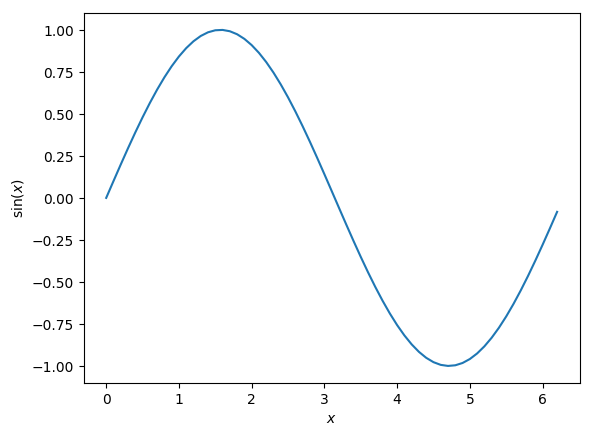

In [30]:
x=collect(0:0.1:2π) # prepare an array from 0 to 2π with a step-size 0.1.
y=sin.(x) # apply sin for each element of x.
plt.plot(x,y)
plt.xlabel(raw"$x$")
plt.ylabel(raw"$\sin(x)$") #raw enables us to use LaTeX notation.
plt.show()

Here ``a:b:c`` means that making range object from ``a`` to ``c`` with a step-size ``b``.
``collect`` converts range an object to an array.

An operator ``.`` following to ``sin`` means that an element-wise operation.

plots with error bar can be,

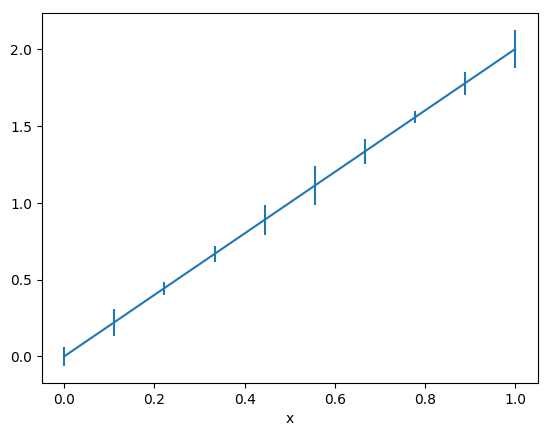

In [19]:
Ndata = 10
x=range(0,1,length=Ndata)
y=2*x
e=rand(Float64,Ndata)/10 .+ 0.025 # ".+" element-wise addition
#
plt.errorbar(x,y,yerr=e)
plt.xlabel("x")
plt.show()

Here ``rand()`` makes a random number, and its argument is a type and the number of elements.

If you use it without arguments, it generates a random number,

In [20]:
for i =1:5
    r=rand()
    println("r=$r")
end

r=0.955002651560729
r=0.484345366558276
r=0.38197451195769827
r=0.8676661959532814
r=0.8583419384882576


We can make a histogram plots,

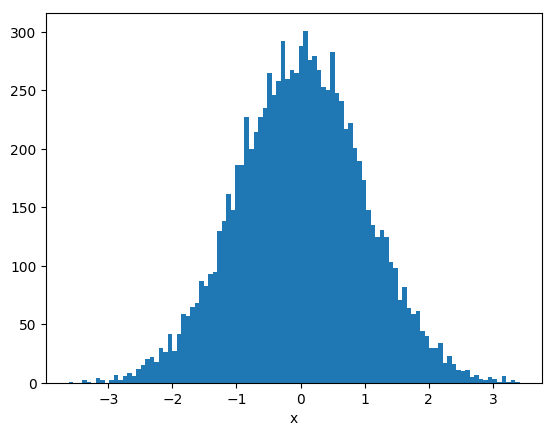

In [21]:
x=randn(10000)
plt.hist(x,bins=100)
plt.xlabel("x")
plt.show()

Here ``randn()`` makes a random number with the normal distoribution.

## Julia with Numpy 

Here I use numpy in Julia as an example of PyCall function.

To use it, please refer,

https://github.com/JuliaPy/PyCall.jl

In [31]:
using PyCall
np=pyimport("numpy");

After execution of above cell, you can use numpy functions like ``np.hoge`` as Python.

For example, to use ``linspace ``,

In [32]:
np.linspace(0,1,5)

5-element Array{Float64,1}:
 0.0
 0.25
 0.5
 0.75
 1.0

results are julia objects.

Note that, you can use ``np.loadtxt`` to load a text file.

# Toy examples of numerical caluculations

Here I explain the Euler method for solving differential equations and Monte-Carlo integration for numerical integration.

## Euler method

The Euler method is the simplest method to solve a ordinary differential equation,

$$
\frac{dx(t)}{dt} = \cdots
$$

To introduce the Euler method, 
we discretize the left hand side,

$$
\frac{x(t+h)-x(t)}{h} = \cdots
$$

and multiply $h$ to the both side,

$$
x(t+h)-x(t) = (\cdots)\times h
$$

and solve it to $x(t+h)$,

$$
x(t+h) = x(t) + (\cdots)\times h
$$

and solve it step by step.

We solve an equation,


$$
\frac{dx}{dt} = -4(t-1)x
$$

The initial condition is, $x(t=0)=e^{-2}$.
We solve it with a range $0<t<1$
and take a step length is $h=0.1$.

Here we introduce a function of Julia.

In REPL or Jupyter notebook, type ``\euler`` and tab key, then you get, ``ℯ``.
``ℯ`` is different from ``e``, and it represents the Napia constant,

In [33]:
ℯ

ℯ = 2.7182818284590...

Following is an example of the Eular method,

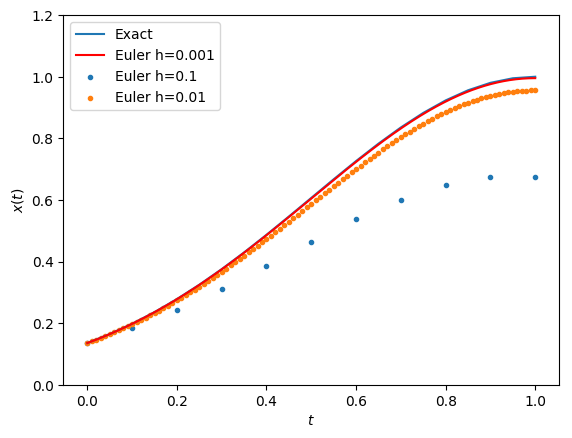

In [34]:
using PyPlot: plt #To make this cell self-contained

#
# Plot Exact solution
t_plot=collect(0:0.05:1)
x_plot=ℯ.^(-2*(t_plot.-1).^2)
plt.plot(t_plot,x_plot,label="Exact")
#
function eular_method(x_init,tmin,tmax;h,line) # semi-collon in the argument is key ward argument
    Nmax = Int((tmax-tmin)/h) # Int(...) means casting of type to integer
    x = x_init
    t_plot=Float64[0.0]
    x_plot=Float64[x]
    for it=1:Nmax
        t=tmin+it*h
        x=x-4.0*(t-1.0)*x*h
        append!(t_plot,t)
        append!(x_plot,x)
    end
    if line
        plt.plot(t_plot,x_plot,label="Euler h=$h",color="red")
    else
        plt.scatter(t_plot,x_plot,label="Euler h=$h",marker=".")
    end
end
eular_method(ℯ^(-2),0.0,1.0,h=0.1,line=false)
eular_method(ℯ^(-2),0.0,1.0,h=0.01,line=false)
eular_method(ℯ^(-2),0.0,1.0,h=0.001,line=true)
#
plt.ylabel(raw"$x(t)$") 
plt.xlabel(raw"$t$") 
plt.legend() # show label
plt.ylim(0,1.2) # set range of y axis
plt.show()

## Monte-Carlo integration

Here we calculate pi using the Monte-Carlo integration as an exmple.

Following method uses a fact that the ratio of a square and circle in the first quadrant is $π/4$.

Error of the calculation is $O(1/\sqrt{N})$ for a trial $N$ and it is large compare to the other integration schemes.

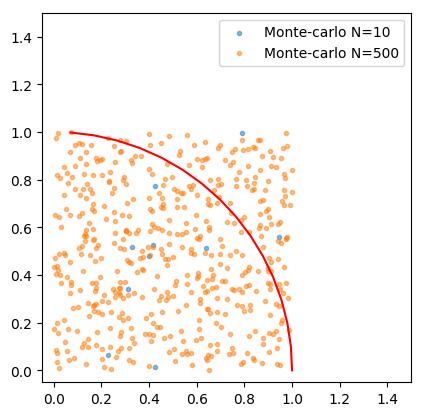

pi10=3.2
pi500=3.176


In [35]:
using PyPlot: plt #To make this cell self-contained

function montecarlo_pi(Nmax=10) # "=" in the argument is called default variable.
    cnt = 0
    x_plot=[]
    y_plot=[]
    for i=1:Nmax
        x=rand()
        y=rand()
        if x^2+y^2 < 1
            cnt+=1
        end
        append!(x_plot,x)
        append!(y_plot,y)
    end
    plt.scatter(x_plot,y_plot,label="Monte-carlo N=$Nmax",marker=".",alpha=0.5)
    return cnt/Nmax*4 # pi = 4*(pi/4)
end
pi10=montecarlo_pi()
println("pi10=$pi10")
pi500=montecarlo_pi(500)
println("pi500=$pi500")
#=
pi10000=montecarlo_pi(10000)
println("pi10000=$pi10000")
=#
#
θ = collect(0:0.1:π/2)
x_plot = cos.(θ)
y_plot = sin.(θ)
plt.plot(x_plot,y_plot,color="red")
#
plt.axes().set_aspect("equal")
plt.xlim(-0.05,1.5)
plt.ylim(-0.05,1.5)
plt.legend() # show label
plt.show()

here
```
#=
...
=#
```
means comments for multiple lines.

## Linear algebra

I do not explain in details but here I quickly show some functions of linear algebra in Julia.
It requires LinearAlgebra module.

In [36]:
using LinearAlgebra

Followings are typical functions.

In [37]:
# trace
A = [
    1 0
    0 2
]
println("tr(A)=$(tr(A))")

tr(A)=3


In [37]:
# inverse of a matric
A = [
    1 0
    0 2
]
println("inv(A)=$(inv(A))")

inv(A)=[1.0 0.0; 0.0 0.5]


In [38]:
# determinant
A = [
    1 0
    0 2
]
println("det(A)=$(det(A))")

det(A)=2.0
